# ENTREGA FINAL 
## GeoDataFrame


In [1]:
from  fiona import listlayers
import os

russiaMaps=os.path.join('maps','russiaMaps_5940_all.gpkg')

#layers in maps
listlayers(russiaMaps)


['airports',
 'states',
 'municipalities',
 'country',
 'cities',
 'rivers',
 'border']

In [2]:
# reading in the data:
import os
import geopandas as gpd

states=gpd.read_file(russiaMaps,layer='states')
municipalities=gpd.read_file(russiaMaps,layer='municipalities')
airports=gpd.read_file(russiaMaps,layer='airports')
rivers=gpd.read_file(russiaMaps,layer='rivers')
border=gpd.read_file(russiaMaps,layer='border')

In [3]:
import pandas as pd 


portsFile=os.path.join('data','UpdatedPub150.csv')

infoseaports=pd.read_csv(portsFile)

infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [4]:
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)

infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [5]:
#SIEMPRE QUE HAY LATITUD/lONGITUD EL TIPO DE CRS ES NO PROYECTADO
infoseaports.head()


portName   Country Code   Latitude   Longitude
0                 Maurer  United States  40.533333  -74.250000
1  Mangkasa Oil Terminal      Indonesia  -2.733333  121.066667
2                Iharana     Madagascar -13.350000   50.000000
3                Andoany     Madagascar -13.400000   48.300000
4            Chake Chake       Tanzania  -5.250000   39.766667

In [6]:
#el crs NO PROYECTADO es el 4326
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=4326)


seaports_russ=seaports[seaports['Country Code']=='Russia'].copy()


seaports_russ.reset_index(drop=True, inplace=True)


seaports_russ_5940=seaports_russ.to_crs(5940)

<Axes: >

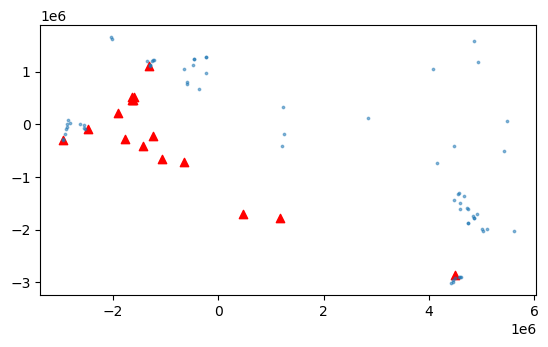

In [7]:
largeAirports=airports[airports['kind']=='large_airport']
largeAirports.reset_index(drop=True, inplace=True)


base=largeAirports.plot(color='red',marker="^")
seaports_russ_5940.plot(ax=base,alpha=0.5,markersize=3)

# EJERCICIO 01:
## Distance between points

1. Use two maps of points.

2. Compute the distance matrix for both maps.

3. Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.

In [8]:
seaports_russ_5940.head()

portName Country Code   Latitude   Longitude  \
0        Bukhta Gaydamak       Russia  42.866667  132.683333   
1                  Adler       Russia  43.433333   39.933333   
2  Vitaz Marine Terminal       Russia  52.700000  143.550000   
3               Shakotan       Russia  43.866667  146.833333   
4                   Azov       Russia  47.100000   39.433333   

                           geometry  
0  POINT (4572656.440 -2903653.774)  
1  POINT (-2954064.563 -303104.287)  
2  POINT (4672279.177 -1353504.256)  
3  POINT (5606042.767 -2028420.271)  
4   POINT (-2542815.985 -63900.270)

In [9]:
largeAirports.head()

name           kind  latitude_deg  \
0  Sheremetyevo International Airport  large_airport     55.972599   
1    Domodedovo International Airport  large_airport     55.408798   
2                     Pulkovo Airport  large_airport     59.800301   
3       Vnukovo International Airport  large_airport     55.591499   
4      Novosibirsk Tolmachevo Airport  large_airport     55.019756   

   longitude_deg  elevation_ft              region_name    municipality  \
0      37.414600         622.0            Moscow Oblast          Moscow   
1      37.906300         588.0            Moscow Oblast          Moscow   
2      30.262501          78.0  Saint Petersburg (city)  St. Petersburg   
3      37.261501         685.0            Moscow Oblast          Moscow   
4      82.618675         365.0       Novosibirsk Oblast     Novosibirsk   

                           geometry  
0   POINT (-1594689.376 517304.239)  
1   POINT (-1644777.787 459913.318)  
2  POINT (-1308631.240 1097188.014)  
3   POINT (-1641365.027 509424.872)  
4   POINT (475373.773 -1702445.286)

In [10]:
seaports_russ_5940.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name                         Domodedovo International Airport  \
portName                                                        
Adler                                             1515.396887   
Aleksandrovsk -Sakhalinskiy                       6691.636239   
Anapa                                             1318.552050   
Arkhangels'k                                      1094.244533   
Azov                                              1039.640938   
...                                                       ...   
Vladivostok                                       6999.656683   
Vostochnyy                                        7103.230129   
Vyborg                                             859.748673   
Yeysk                                             1080.059646   
Zarubino                                          7007.392272   

name                         Gagarin International Airport  \
portName                                                     
Adler                                          1180.950056   
Aleksandrovsk -Sakhalinskiy                    6627.905858   
Anapa                                          1140.976305   
Arkhangels'k                                   1576.097030   
Azov                                            799.993909   
...                                                    ...   
Vladivostok                                    6792.255790   
Vostochnyy                                     6902.482135   
Vyborg                                         1590.452337   
Yeysk                                           902.539778   
Zarubino                                       6789.535502   

name                         Kazan International Airport  Koltsovo Airport  \
portName                                                                     
Adler                                        1706.591112       2345.711677   
Aleksandrovsk -Sakhalinskiy                  6130.487328       5439.876128   
Anapa                                        1643.459045       2346.191521   
Arkhangels'k                                 1177.216855       1484.004464   
Azov                                         1301.874666       2007.538429   
...                                                  ...               ...   
Vladivostok                                  6341.142857       5583.091564   
Vostochnyy                                   6448.889369       5693.041546   
Vyborg                                       1425.913484       2016.906049   
Yeysk                                        1395.516513       2111.796747   
Zarubino                                     6342.642691       5581.098930   

name                         Krasnoyarsk International Airport  \
portName                                                         
Adler                                              4371.551421   
Aleksandrovsk -Sakhalinskiy                        3564.349331   
Anapa                                              4412.947392   
Arkhangels'k                                       3083.469973   
Azov                                               4080.857544   
...                                                        ...   
Vladivostok                                        3516.113071   
Vostochnyy                                         3630.154818   
Vyborg                                             3821.806027   
Yeysk                                              4188.512662   
Zarubino                                           3507.329552   

name                         Kurumoch International Airport  Lipetsk Air Base  \
portName                                                                        
Adler                                           1533.389250       1167.951244   
Aleksandrovsk -Sakhalinskiy                     6260.625062       6878.766875   
Anapa                                           1511.453268        994.337498   
Arkhangels'k                                    1439.114772       14

In [11]:
#Guardo el codigo
distanceMatrixKM_sea_air= seaports_russ_5940.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [12]:
SomeStats=pd.DataFrame()
SomeStats['min1'] = distanceMatrixKM_sea_air.apply(lambda row: row.nsmallest(1).values[0], axis=1)
SomeStats['min2'] = distanceMatrixKM_sea_air.apply(lambda row: row.nsmallest(2).values[-1], axis=1)

SomeStats.head(1)

min1        min2
portName                      
Adler     3.101497  523.738573

# EJERCICIO 02
## Distance between line and point

1. Use a map of points and a map of lines.

2. Compute the distance matrix for both maps.

3. Select one line of the distance matrix, and plot the closests and the farthest point to that line.

In [20]:
#Agrego el segundo mapa (rivers), el primer mapa sera largeAirports
rivers

NAME SYSTEM                                           geometry
0      Amur    NaN  MULTILINESTRING ((3057370.355 -2549290.041, 30...
1     Aldan   Lena  LINESTRING (3246715.035 -1619331.482, 3192467....
2    Kolyma    NaN  LINESTRING (3949007.836 688333.806, 3991444.15...
3    Angara    NaN  MULTILINESTRING ((2005998.009 -2383015.585, 19...
4    Irtysh     Ob  LINESTRING (-52594.773 -1593373.690, -47674.25...
5        Ob     Ob  MULTILINESTRING ((83734.271 -644406.441, 63598...
6   Yenisey    NaN  MULTILINESTRING ((1546238.603 -2279212.961, 14...
7      Lena   Lena  MULTILINESTRING ((3243504.624 -717142.384, 319...
8    Vilyuy   Lena  LINESTRING (3062114.417 -678286.603, 3067596.5...
9     Tobol     Ob  LINESTRING (-673929.518 -1093286.336, -667346....
10     Ural    NaN  MULTILINESTRING ((-1518901.800 -700941.771, -1...
11     Kama    NaN  LINESTRING (-809826.225 -273358.004, -792864.0...
12      Don    NaN  LINESTRING (-2535870.451 -62651.357, -2486638....
13    Volga    NaN  LINESTRING (-1548466.682 860132.421, -1580962....
14  Pechora    NaN  LINESTRING (-232660.521 -205687.752, -258044.0...
15  Dnieper    NaN  LINESTRING (-1682175.445 736027.591, -1694440....
16     Suir    NaN  MULTILINESTRING ((-1079430.779 876672.449, -10...
17     Neva    NaN  MULTILINESTRING ((-1268739.772 1046868.488, -1...

In [22]:
#Creo la matriz de distancias para ambos mapas
distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

name     Domodedovo International Airport  Gagarin International Airport  \
NAME                                                                       
Aldan                         5027.998116                    5035.582733   
Amur                          5431.181496                    5251.089026   
Angara                        3530.663620                    3285.699633   
Dnieper                        264.285863                    1002.785095   
Don                            161.753368                     328.568498   
Irtysh                        2014.289618                    1734.251864   
Kama                           807.031244                     500.448066   
Kolyma                        5547.749069                    5709.264340   
Lena                          4330.983336                    4115.449095   
Neva                           666.349405                    1371.285874   
Ob                            1878.027259                    1827.625657   
Pechora                       1409.739657                    1415.149178   
Suir                           669.663606                    1299.348913   
Tobol                         1831.659228                    1365.954481   
Ural                          1167.659755                     489.627221   
Vilyuy                        3766.482974                    3736.285278   
Volga                          171.508841                      15.185173   
Yenisey                       2842.135587                    2926.968183   

name     Kazan International Airport  Koltsovo Airport  \
NAME                                                     
Aldan                    4521.215912       3888.328216   
Amur                     4786.906715       4042.003349   
Angara                   2840.972611       2076.616665   
Dnieper                  1034.955544       1781.774637   
Don                       747.180126       1528.675097   
Irtysh                   1291.388906        524.606363   
Kama                       47.907842        323.246149   
Kolyma                   5181.481989       4650.039807   
Lena                     3661.810584       2905.787386   
Neva                     1183.785374       1761.120546   
Ob                       1309.291503        717.200900   
Pechora                   887.482871        628.628301   
Suir                     1035.789826       1565.268054   
Tobol                    1050.167533        349.110969   
Ural                      555.453694        254.877223   
Vilyuy                   3225.831272       2586.124853   
Volga                       0.123628        780.777353   
Yenisey                  2411.513501       1747.352368   

name     Krasnoyarsk International Airport  Kurumoch International Airport  \
NAME                                                                         
Aldan                          2035.497334                     4678.017760   
Amur                           2012.928145                     4878.976049   
Angara                          242.622233                     2913.869678   
Dnieper                        3791.541827                     1163.796201   
Don                            3595.674022                      694.896654   
Irtysh                         1171.242617                     1362.128816   
Kama                           2269.211528                      217.114367   
Kolyma                         3181.395618                     5377.012569   
Lena                            885.064391                     3743.366440   
Neva                           3586.907610                     1398.847511   
Ob                              531.356137                     1475.811265   
Pechora                        2098.372697                     1094.741925   
Suir                           3365.119672                     1272.652359   
Tobol                          1577.608083                     1013.331380   
Ural                           2239.531487                      303.38

In [39]:
#Como usaremos como linea a un sistema, entonces preparamos para disolver
rivers[~rivers.SYSTEM.isna()]

NAME SYSTEM                                           geometry
1   Aldan   Lena  LINESTRING (3246715.035 -1619331.482, 3192467....
4  Irtysh     Ob  LINESTRING (-52594.773 -1593373.690, -47674.25...
5      Ob     Ob  MULTILINESTRING ((83734.271 -644406.441, 63598...
7    Lena   Lena  MULTILINESTRING ((3243504.624 -717142.384, 319...
8  Vilyuy   Lena  LINESTRING (3062114.417 -678286.603, 3067596.5...
9   Tobol     Ob  LINESTRING (-673929.518 -1093286.336, -667346....

In [40]:
systems=rivers.dissolve(by='SYSTEM')
systems

geometry    NAME
SYSTEM                                                           
Lena    MULTILINESTRING ((3246715.035 -1619331.482, 31...   Aldan
Ob      MULTILINESTRING ((-52594.773 -1593373.690, -47...  Irtysh

In [41]:
#para que no aparezca el SYSTEM afuera

systems.reset_index(drop=False,inplace=True)
systems.drop(columns='NAME',inplace=True)

systems

SYSTEM                                           geometry
0   Lena  MULTILINESTRING ((3246715.035 -1619331.482, 31...
1     Ob  MULTILINESTRING ((-52594.773 -1593373.690, -47...

In [43]:
#Creamos una matriz entre sistema y aeropuertos
#distancia entre sitema y aeropuertos
distanceMatrixKM_sys_air=systems.set_index('SYSTEM').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sys_air

name    Domodedovo International Airport  Gagarin International Airport  \
SYSTEM                                                                    
Lena                         3766.482974                    3736.285278   
Ob                           1831.659228                    1365.954481   

name    Kazan International Airport  Koltsovo Airport  \
SYSTEM                                                  
Lena                    3225.831272       2586.124853   
Ob                      1050.167533        349.110969   

name    Krasnoyarsk International Airport  Kurumoch International Airport  \
SYSTEM                                                                      
Lena                           885.064391                     3376.567655   
Ob                             531.356137                     1013.331380   

name    Lipetsk Air Base  Novosibirsk Tolmachevo Airport  \
SYSTEM                                                     
Lena         3958.870588                     1571.989455   
Ob           1805.744965                       33.195292   

name    Platov International Airport  Pulkovo Airport  \
SYSTEM                                                  
Lena                     4461.986391      3710.534353   
Ob                       2069.622333      1976.197075   

name    Sheremetyevo International Airport  Sochi International Airport  \
SYSTEM                                                                    
Lena                           3737.070580                  4906.896096   
Ob                             1855.209076                  2410.072622   

name    Ufa International Airport  Vladivostok International Airport  \
SYSTEM                                                                 
Lena                  3010.577975                        1764.007075   
Ob                     589.320016                        3948.079082   

name    Vnukovo International Airport  Zhukovsky International Airport  
SYSTEM                                                                  
Lena                      3778.730258                      3742.236297  
Ob                        1872.061613                      1812.395401

In [49]:
#Obtenemos las minimos distancias por sistema
mins=distanceMatrixKM_sys_air.idxmin(axis="columns") 
mins

SYSTEM
Lena    Krasnoyarsk International Airport
Ob         Novosibirsk Tolmachevo Airport
dtype: object

In [45]:
#Me quedo solo uno
mins.iloc[1]

'Novosibirsk Tolmachevo Airport'

In [46]:
base=systems.explore()

largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))


# EJERCICIO 03
## Polygon to point

1. Create a set of points and a set of polygons

2. Compute the distance matrix for both sets.

3. Select one polygon of the distance matrix, and plot the closests and the farthest point to that polygon.

In [56]:
#Se crea un poligono convexo que contenga las geometrias del ejercicio anterior en el conjunto
systems.convex_hull

0    POLYGON ((2093926.107 -2138584.299, 2026708.60...
1    POLYGON ((520296.618 -2422024.987, 481647.688 ...
dtype: geometry

<Axes: >

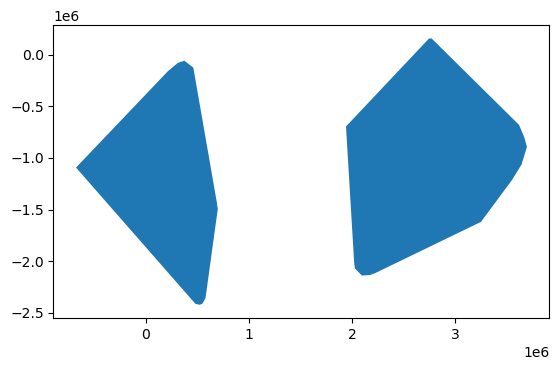

In [57]:
#Lo graficamos
systems.convex_hull.plot()

In [63]:
systems_hulls=systems.convex_hull.to_frame()
systems_hulls['system']=['Lena', 'Ob']
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:5940"
systems_hulls

geometry system
0  POLYGON ((2093926.107 -2138584.299, 2026708.60...   Lena
1  POLYGON ((520296.618 -2422024.987, 481647.688 ...     Ob

In [64]:
#Como parate del ejercicio se crea la matriz
distanceMatrixKM_sysHull_air=systems_hulls.set_index('system').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

name    Domodedovo International Airport  Gagarin International Airport  \
system                                                                    
Lena                         3766.482974                    3736.285278   
Ob                           1774.528190                    1365.954481   

name    Kazan International Airport  Koltsovo Airport  \
system                                                  
Lena                    3225.831272       2586.124853   
Ob                      1022.818275        236.594547   

name    Krasnoyarsk International Airport  Kurumoch International Airport  \
system                                                                      
Lena                           840.161394                     3376.567655   
Ob                             498.096617                     1013.331380   

name    Lipetsk Air Base  Novosibirsk Tolmachevo Airport  \
system                                                     
Lena         3958.870588                     1522.480341   
Ob           1803.072357                        0.000000   

name    Platov International Airport  Pulkovo Airport  \
system                                                  
Lena                     4461.986391      3710.534353   
Ob                       2069.622333      1971.111691   

name    Sheremetyevo International Airport  Sochi International Airport  \
system                                                                    
Lena                           3737.070580                  4906.896096   
Ob                             1777.892125                  2410.072622   

name    Ufa International Airport  Vladivostok International Airport  \
system                                                                 
Lena                  3010.577975                        1764.007075   
Ob                     587.813297                        3947.967254   

name    Vnukovo International Airport  Zhukovsky International Airport  
system                                                                  
Lena                      3778.730258                      3742.236297  
Ob                        1806.230339                      1752.165499

In [65]:
mins=distanceMatrixKM_sysHull_air.idxmin(axis="columns")
mins

system
Lena    Krasnoyarsk International Airport
Ob         Novosibirsk Tolmachevo Airport
dtype: object

In [66]:
#Se grafican los puntos más cercanos y más lejanos
base=systems_hulls.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

# EJERCICIO 04
## Distances using Buffers

1. Create a set of points and a set of lines

2. Get the buffer for the lines, select different values for the distance.

3. Keep the points that are within the buffer (as in point 2, you need to play with differn distances until you show something interesting.

In [85]:
#Recordando de los ejercicios anteriores, se trabajara con el conjunto de puntos de aeropuertos y el conjunto de lineas seran los rios
distanceMatrixKM_riv_air

name     Domodedovo International Airport  Gagarin International Airport  \
NAME                                                                       
Aldan                         5027.998116                    5035.582733   
Amur                          5431.181496                    5251.089026   
Angara                        3530.663620                    3285.699633   
Dnieper                        264.285863                    1002.785095   
Don                            161.753368                     328.568498   
Irtysh                        2014.289618                    1734.251864   
Kama                           807.031244                     500.448066   
Kolyma                        5547.749069                    5709.264340   
Lena                          4330.983336                    4115.449095   
Neva                           666.349405                    1371.285874   
Ob                            1878.027259                    1827.625657   
Pechora                       1409.739657                    1415.149178   
Suir                           669.663606                    1299.348913   
Tobol                         1831.659228                    1365.954481   
Ural                          1167.659755                     489.627221   
Vilyuy                        3766.482974                    3736.285278   
Volga                          171.508841                      15.185173   
Yenisey                       2842.135587                    2926.968183   

name     Kazan International Airport  Koltsovo Airport  \
NAME                                                     
Aldan                    4521.215912       3888.328216   
Amur                     4786.906715       4042.003349   
Angara                   2840.972611       2076.616665   
Dnieper                  1034.955544       1781.774637   
Don                       747.180126       1528.675097   
Irtysh                   1291.388906        524.606363   
Kama                       47.907842        323.246149   
Kolyma                   5181.481989       4650.039807   
Lena                     3661.810584       2905.787386   
Neva                     1183.785374       1761.120546   
Ob                       1309.291503        717.200900   
Pechora                   887.482871        628.628301   
Suir                     1035.789826       1565.268054   
Tobol                    1050.167533        349.110969   
Ural                      555.453694        254.877223   
Vilyuy                   3225.831272       2586.124853   
Volga                       0.123628        780.777353   
Yenisey                  2411.513501       1747.352368   

name     Krasnoyarsk International Airport  Kurumoch International Airport  \
NAME                                                                         
Aldan                          2035.497334                     4678.017760   
Amur                           2012.928145                     4878.976049   
Angara                          242.622233                     2913.869678   
Dnieper                        3791.541827                     1163.796201   
Don                            3595.674022                      694.896654   
Irtysh                         1171.242617                     1362.128816   
Kama                           2269.211528                      217.114367   
Kolyma                         3181.395618                     5377.012569   
Lena                            885.064391                     3743.366440   
Neva                           3586.907610                     1398.847511   
Ob                              531.356137                     1475.811265   
Pechora                        2098.372697                     1094.741925   
Suir                           3365.119672                     1272.652359   
Tobol                          1577.608083                     1013.331380   
Ural                           2239.531487                      303.38

In [70]:
#Se obtiene el buffer para las líneas
bufferAroundOb=rivers[rivers.NAME=='Ob'].buffer(distance = minMts)
bufferAsBase=bufferAroundOb.explore(color='red')
rivers[rivers.NAME=='Ob'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

In [72]:
#Observamos que  estan todos los pequeños aeropuertos y algunos caen dentro del buffer
small_airports=airports[airports['kind']=='small_airport']

# graficamos
rivers[rivers.NAME=='Ob'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
small_airports.explore(m=bufferAsBase,color='black')

In [74]:
#rios dentro del buffer
riversWithinBuffer=small_airports.clip(mask=bufferAroundOb)

riversWithinBuffer

name           kind  latitude_deg  longitude_deg  \
948             Ust-Koksa Airport  small_airport     50.264711      85.713489   
549            Barantal Aerodrome  small_airport     51.446630      85.988850   
526  Karasuk Vertodrome-Aerodrome  small_airport     51.561840      85.918510   
708             Manzherok Airport  small_airport     51.825260      85.805930   
488               Lesnoy Airfield  small_airport     53.251722      83.954945   
176              Iskitim Airfield  small_airport     54.600000      83.300000   
498             Yuzhnaya Airfield  small_airport     54.654719      83.078699   
497               Berdsk Airfield  small_airport     54.735001      83.095001   
767                ObGES Airfield  small_airport     54.874001      82.983002   
143   Gorodskoy Aeroport Airfield  small_airport     55.095730      82.909450   
768            Mochische Airfield  small_airport     55.168999      83.142998   
996             Yurt-Ora Airstrip  small_airport     55.450175      82.916468   
912           Beryozkino Airfield  small_airport     56.502640      84.686575   
639            Kolpashevo Airport  small_airport     58.325298      82.932503   
797               Parabel Airport  small_airport     58.707480      81.464330   
602              Kargasok Airport  small_airport     59.061858      80.823204   
458      Aleksandrovskoye Airport  small_airport     60.445636      77.837069   

     elevation_ft         region_name       municipality  \
948        3235.0      Altai Republic  Ust-Koksa Airport   
549        1598.0      Altai Republic          Elekmonar   
526        1234.0      Altai Republic            Cheposh   
708        1293.0      Altai Republic          Manzherok   
488           NaN          Altai Krai            Barnaul   
176           NaN     Novgorod Oblast            Iskitim   
498           NaN  Novosibirsk Oblast             Berdsk   
497           NaN  Novosibirsk Oblast             Berdsk   
767           NaN  Novosibirsk Oblast        Novosibirsk   
143         564.0  Novosibirsk Oblast        Novosibirsk   
768         718.0  Novosibirsk Oblast        Novosibirsk   
996           NaN  Novosibirsk Oblast           Yurt-Ora   
912         394.0        Tomsk Oblast              Tomsk   
639         243.0        Tomsk Oblast         Kolpashevo   
797         177.0        Tomsk Oblast            Parabel   
602         194.0        Tomsk Oblast           Kargasok   
458           NaN        Tomsk Oblast   Aleksandrovskoye   

                            geometry  
948  POINT (483900.668 -2332569.708)  
549  POINT (552688.245 -2200642.806)  
526  POINT (552204.681 -2185355.846)  
708  POINT (554715.363 -2151675.629)  
488  POINT (484535.522 -1938659.687)  
176  POINT (500609.063 -1767803.043)  
498  POINT (488557.341 -1755796.413)  
497  POINT (493275.249 -1747150.857)  
767  POINT (492298.603 -1728506.767)  
143  POINT (497657.636 -1701574.386)  
768  POINT (516074.133 -1699401.283)  
996  POINT (514297.334 -1661863.527)  
912  POINT (672336.449 -1586558.051)  
639  POINT (645450.369 -1341289.849)  
797  POINT (578523.968 -1263613.304)  
602  POINT (559409.347 -1208934.678)  
458   POINT (469261.163 -983241.537)

In [75]:
#Solo nos quedamos con los aeropuertos que caen dentro del buffer
bufferAsBase=bufferAroundOb.explore(color='red')
rivers[rivers.NAME=='Ob'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='black')

# EJERCICIO 05
## Using data from spatial objects

1. Get a polygons map of the lowest administrative unit possible.

2. Get a table of variables for those units. At least 3 numerical variables.

3. Preprocess both tables and get them ready for merging.

4. Do the merging, making the changes needed so that you keep the most columns.

# EJERCICIO 06
## Exploring one variable

1. Choose a numeric variable from your merged data.

2. Decide which is the best classification scheme for that variable.

3. Make a map for the best scheme.

4. Make a histogram for the best scheme.

# EJERCICIO 07
## Neighborhood

Compute the neighbors of the capital of your country. Plot the results for each of the options.

# EJERCICIO 08
## Spatial correlation

1. Compute the Moran's coefficient for all your numeric variables.

2. Make a scatter plot for each variable.

# EJERCICIO 09
## Local Spatial Correlation

1. Compute the Local Moran for the variables in your data that have significant spatial correlation.

2. Create a new column for each of those variables, with a label ('0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier').

3. Prepare a map for each of the variables analyzed, showing the spots and outliers.